In [1]:
#Import all the dependencies
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
# import the metrics class
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#read in the preprocessed data as csv using pandas
df = pd.read_csv("preprocessed_data.csv")
df.head() #take a look

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [3]:
df_sub = df.loc[df.category.isin([ "Control", "ProbableAD"])] #read the important identity
df_sub
gender_list = df_sub['gender'] #make a list of categories
gender_list.shape

(477,)

In [4]:
from collections import Counter

a = dict(Counter(gender_list))

print(a)

{'female': 309, 'male': 167, nan: 1}


In [4]:
df_sub['age'].plot.hist()

NameError: name 'df_sub' is not defined

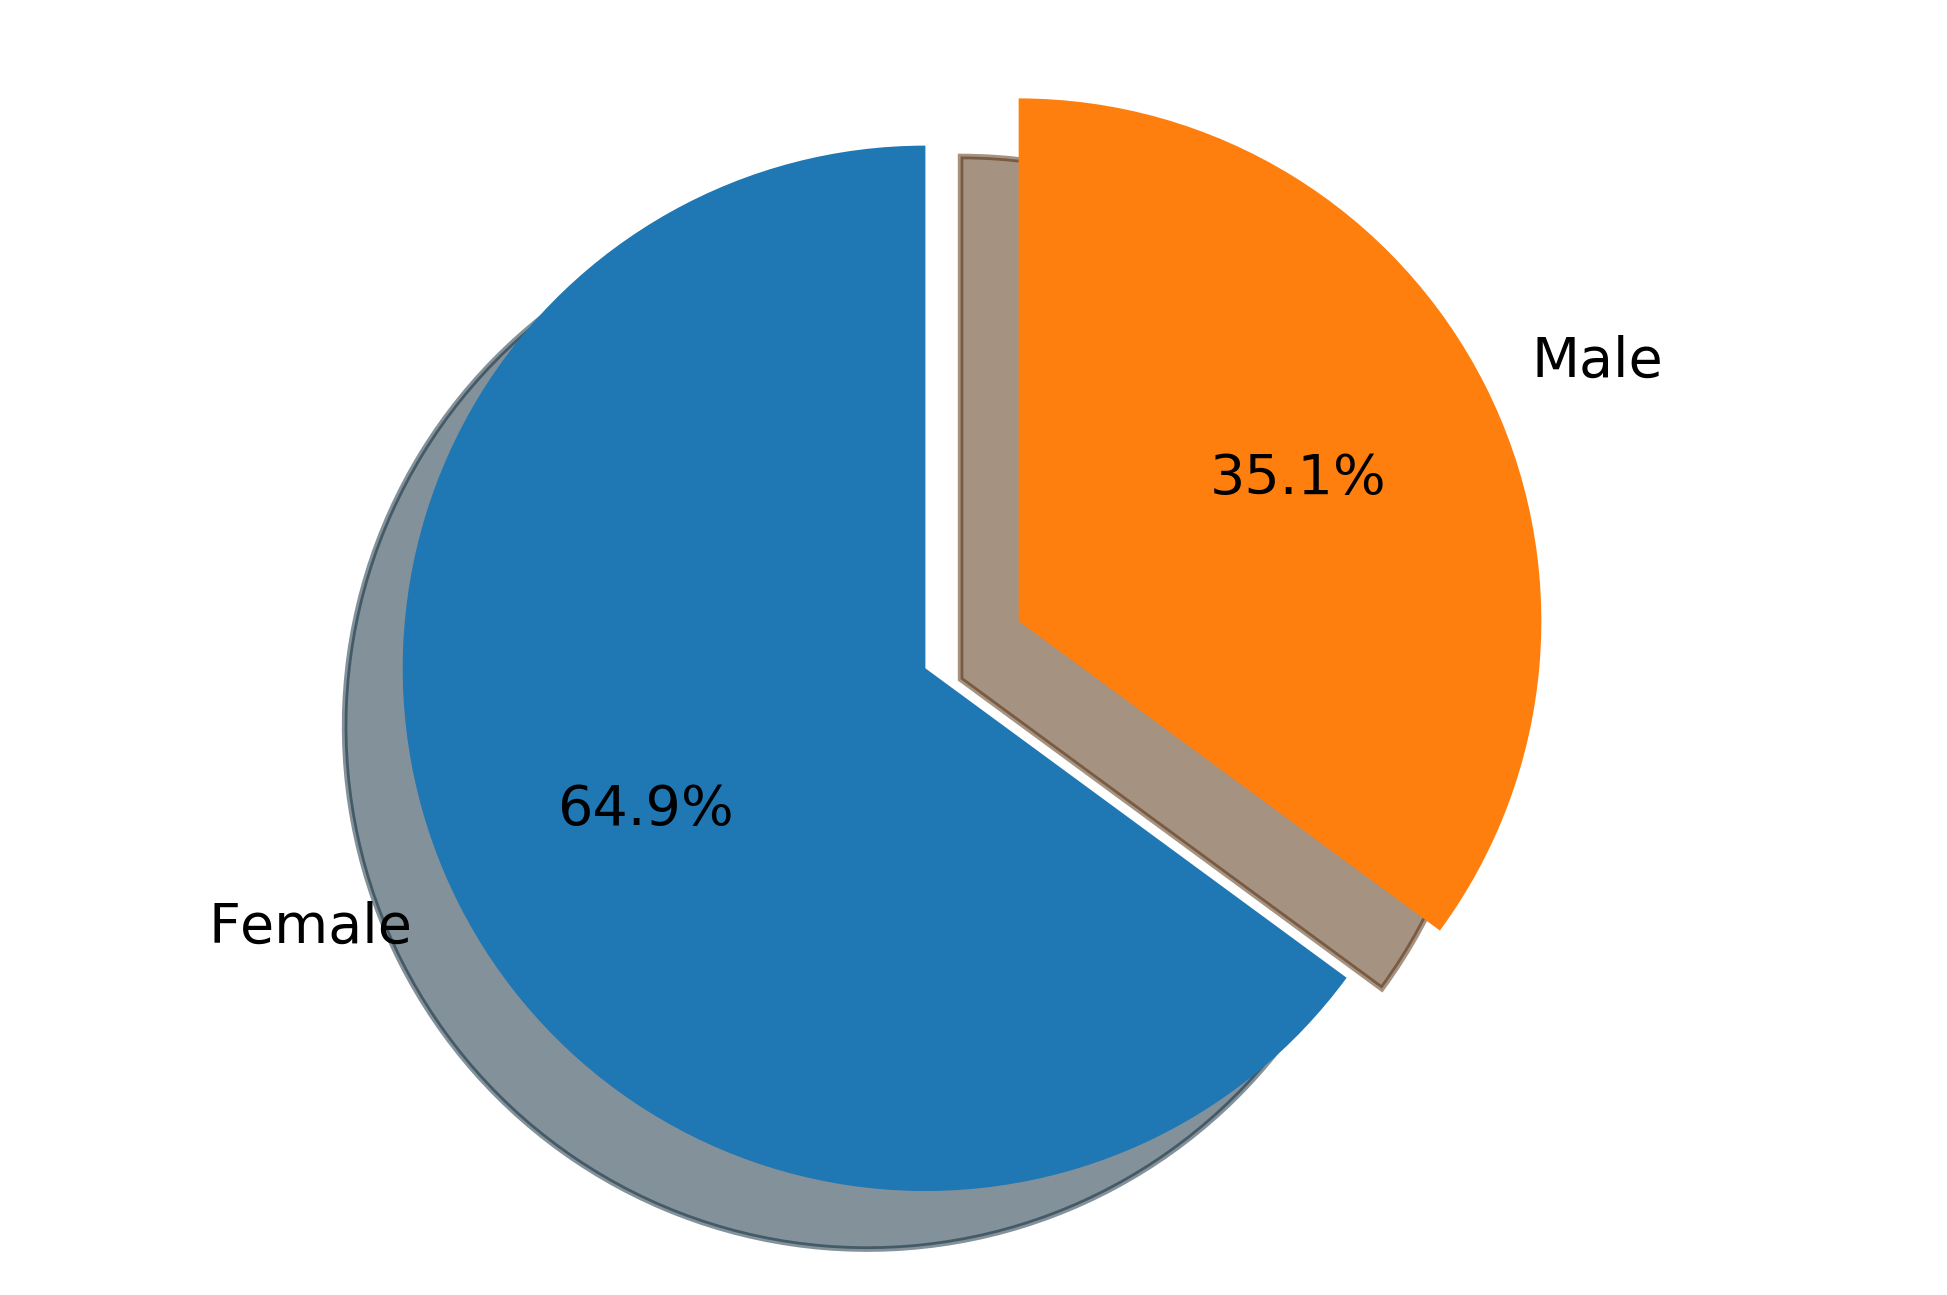

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = [309,167]
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(dpi = 400)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.figure(dpi = 1000)
plt.savefig("gender_dis.png", dpi = 400)
plt.show()

In [6]:
age_list = df_sub['age'] #make a list of categories
age_list.shape

(477,)

In [46]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
fig = px.pie(df, values='pop', names='country',
             title='Population of American continent',
             hover_data=['lifeExp'], labels={'lifeExp':'life expectancy'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

ModuleNotFoundError: No module named 'plotly'

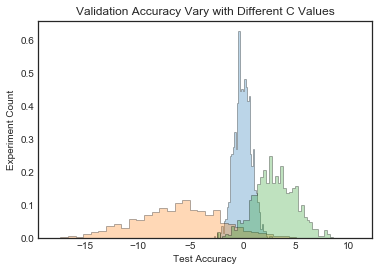

In [52]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-6, 4, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40, ec="k")

plt.title('Validation Accuracy Vary with Different C Values')
plt.ylabel('Experiment Count')
plt.xlabel('Test Accuracy')
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
#x1是原有featrue除去年龄和性别的
plt.show()